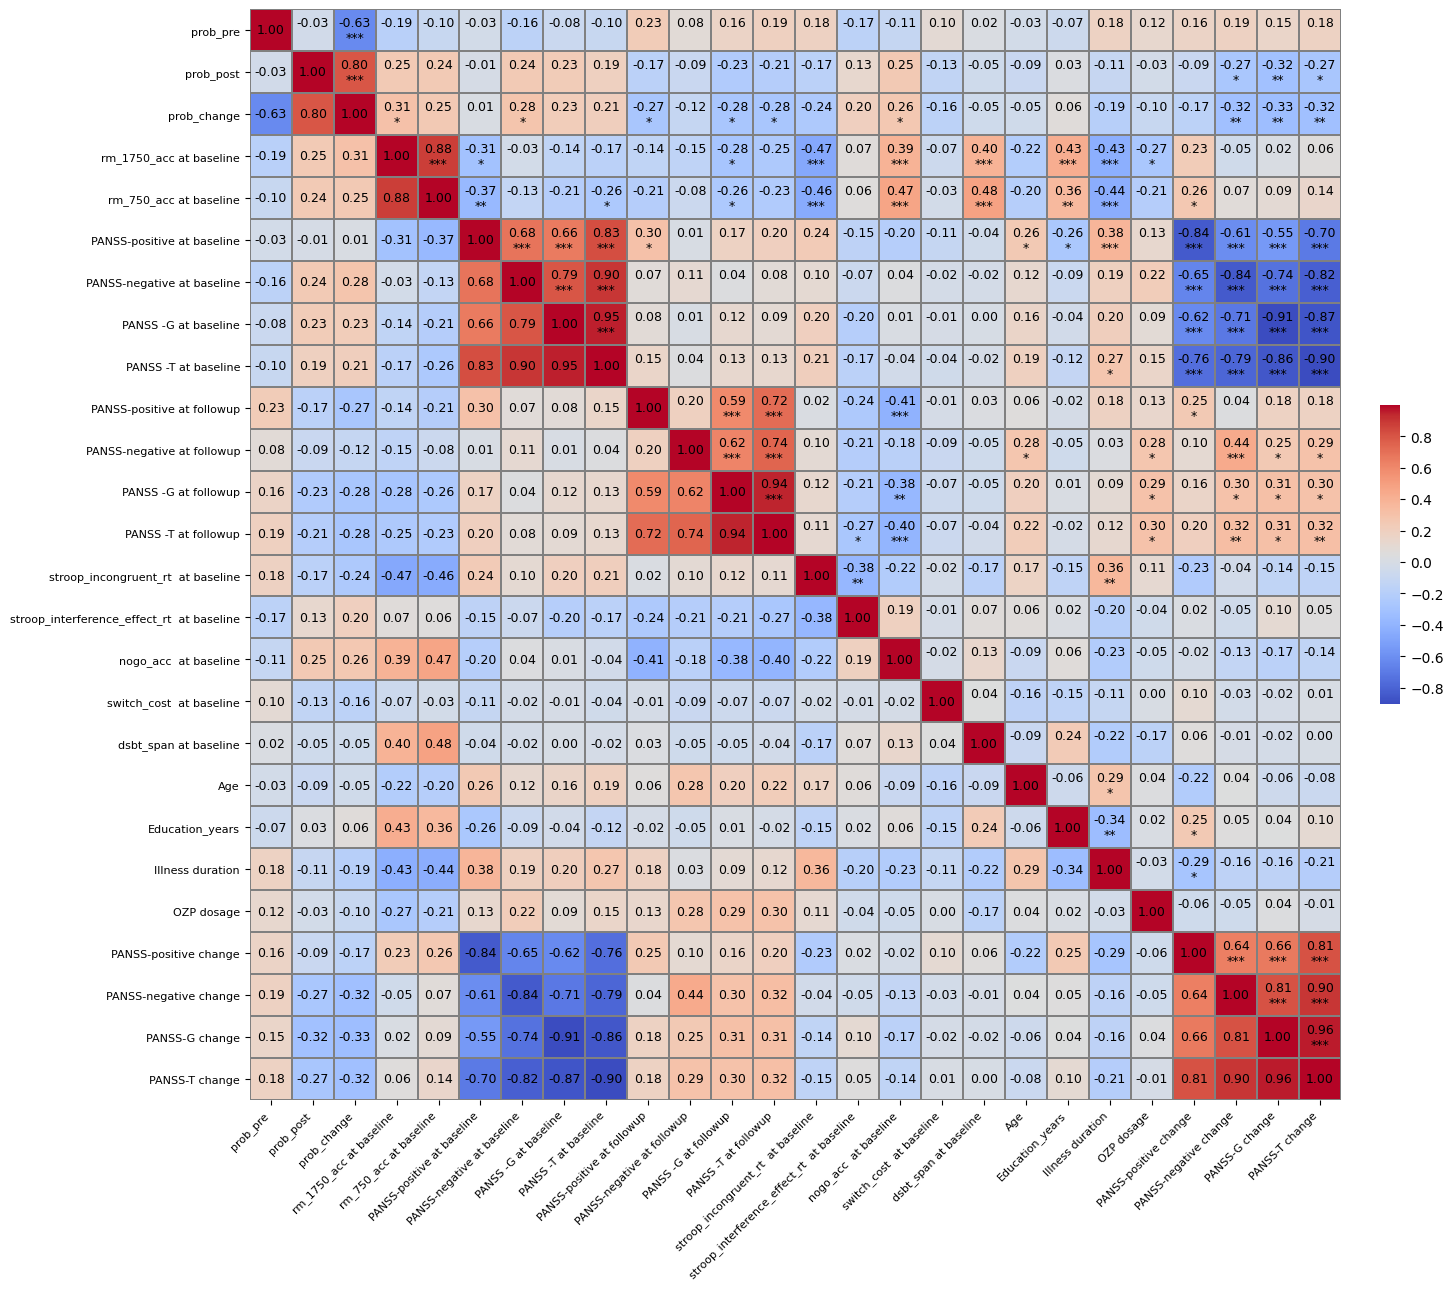

Correlation matrix with PANSS scores and change scores has been successfully generated!


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multitest import multipletests
from scipy import stats

# 读取数据
df = pd.read_excel('table/三组likelihood.xlsx')

# 计算PANSS的变化分数（change score）
df['PANSS-positive change'] = df['PANSS-positive at followup'] - df['PANSS-positive at baseline']
df['PANSS-negative change'] = df['PANSS-negative at followup'] - df['PANSS-negative at baseline']
df['PANSS-G change'] = df['PANSS -G at followup'] - df['PANSS -G at baseline']
df['PANSS-T change'] = df['PANSS -T at followup'] - df['PANSS -T at baseline']

# 删除非数值列（如ID、Group）
numeric_cols = df.select_dtypes(include=['number']).columns

# 计算皮尔逊相关系数矩阵
correlation_matrix = df[numeric_cols].corr(method='pearson')

# 计算原始 P 值矩阵
pvals_matrix = correlation_matrix.copy()
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        if i != j:
            _, pvals_matrix.iloc[i, j] = stats.pearsonr(df[numeric_cols[i]], df[numeric_cols[j]])

# 进行 FDR 校正
pvals = pvals_matrix.to_numpy()[np.triu_indices_from(pvals_matrix.to_numpy(), k=1)]
fdr_results = multipletests(pvals, alpha=0.05, method='fdr_bh')
fdr_rejected = fdr_results[0]
fdr_pvals = fdr_results[1]

# 可视化相关性矩阵
plt.figure(figsize=(16, 16))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.2,
    linecolor="gray",
    cbar_kws={"shrink": 0.2, "aspect": 15, "pad": 0.03, "ticks": np.arange(-0.8, 1.0, 0.2)}
)

# 手动标注相关系数和显著性水平
idx = 0
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        coef = correlation_matrix.values[i, j]
        if i < j:
            if fdr_rejected[idx]:
                if fdr_pvals[idx] < 0.001:
                    sig = '***'
                elif fdr_pvals[idx] < 0.01:
                    sig = '**'
                else:
                    sig = '*'
            else:
                sig = ''
            plt.text(
                j + 0.5, i + 0.5,
                f"{coef:.2f}\n{sig}",
                ha="center", va="center", color="black", fontsize=9
            )
            idx += 1
        else:
            plt.text(
                j + 0.5, i + 0.5,
                f"{coef:.2f}",
                ha="center", va="center", color="black", fontsize=9
            )

# 设置标题、轴标签
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

# 保存图片并显示
plt.savefig('./image/likelihood_correlation_matrix_with_panss.jpg', dpi=1200, bbox_inches='tight')
plt.show()

# 保存相关性矩阵到Excel文件
correlation_matrix.to_excel('table/likelihood_correlation_matrix.xlsx')

print("Correlation matrix with PANSS scores and change scores has been successfully generated!")

与 prob_change 显著相关的变量： ['rm_1750_acc at baseline', 'rm_750_acc at baseline', 'PANSS-negative at baseline', 'PANSS -G at baseline', 'PANSS -T at baseline', 'PANSS-positive at followup', 'PANSS -G at followup', 'PANSS -T at followup', 'stroop_incongruent_rt  at baseline', 'nogo_acc  at baseline', 'PANSS-negative change', 'PANSS-G change', 'PANSS-T change']

所有显著相关变量的统计结果：
变量：rm_1750_acc at baseline
  样本量：94
  Pearson 相关系数: r = 0.305
  原始 p 值: p = 0.003
  FDR 校正后的 p 值: 0.003
-----------------------------------------------------
变量：rm_750_acc at baseline
  样本量：94
  Pearson 相关系数: r = 0.249
  原始 p 值: p = 0.016
  FDR 校正后的 p 值: 0.016
-----------------------------------------------------
变量：PANSS-negative at baseline
  样本量：94
  Pearson 相关系数: r = 0.285
  原始 p 值: p = 0.005
  FDR 校正后的 p 值: 0.005
-----------------------------------------------------
变量：PANSS -G at baseline
  样本量：94
  Pearson 相关系数: r = 0.226
  原始 p 值: p = 0.029
  FDR 校正后的 p 值: 0.029
--------------------------------------------------

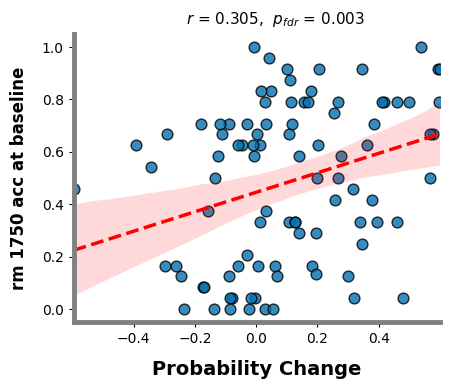

绘制变量 'rm_750_acc at baseline' 的散点图：
  样本量：94
  Pearson 相关系数: r = 0.249
  原始 p 值: p = 0.016
  FDR 校正后的 p 值: 0.016
-----------------------------------------------------


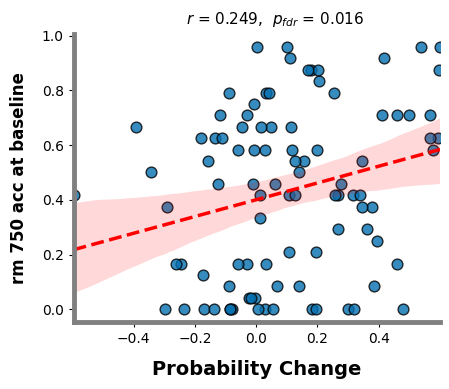

绘制变量 'PANSS-negative at baseline' 的散点图：
  样本量：94
  Pearson 相关系数: r = 0.285
  原始 p 值: p = 0.005
  FDR 校正后的 p 值: 0.005
-----------------------------------------------------


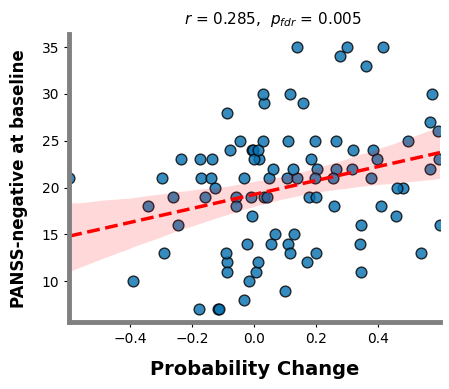

绘制变量 'PANSS -G at baseline' 的散点图：
  样本量：94
  Pearson 相关系数: r = 0.226
  原始 p 值: p = 0.029
  FDR 校正后的 p 值: 0.029
-----------------------------------------------------


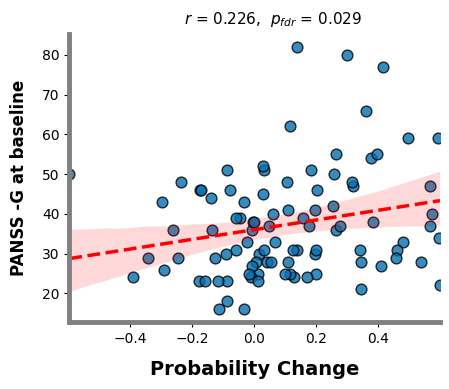

绘制变量 'PANSS -T at baseline' 的散点图：
  样本量：94
  Pearson 相关系数: r = 0.206
  原始 p 值: p = 0.047
  FDR 校正后的 p 值: 0.047
-----------------------------------------------------


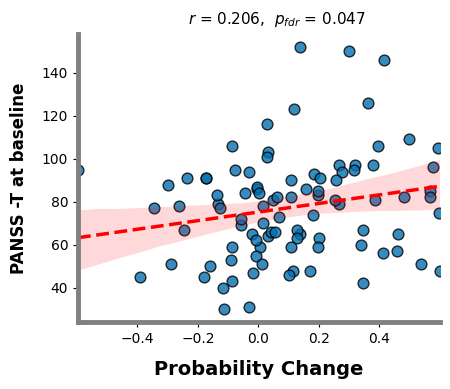

绘制变量 'PANSS-positive at followup' 的散点图：
  样本量：94
  Pearson 相关系数: r = -0.274
  原始 p 值: p = 0.007
  FDR 校正后的 p 值: 0.007
-----------------------------------------------------


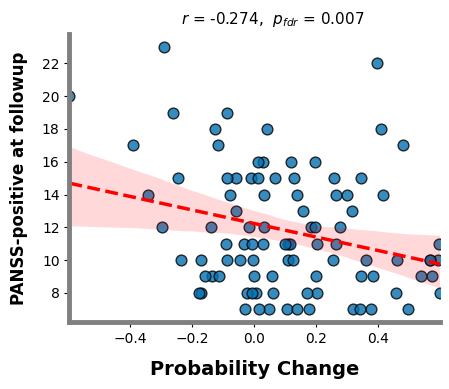

绘制变量 'PANSS -G at followup' 的散点图：
  样本量：94
  Pearson 相关系数: r = -0.277
  原始 p 值: p = 0.007
  FDR 校正后的 p 值: 0.007
-----------------------------------------------------


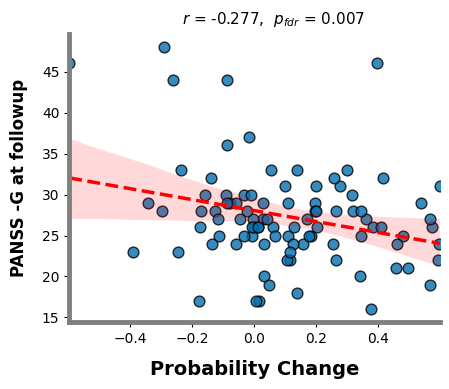

绘制变量 'PANSS -T at followup' 的散点图：
  样本量：94
  Pearson 相关系数: r = -0.279
  原始 p 值: p = 0.006
  FDR 校正后的 p 值: 0.006
-----------------------------------------------------


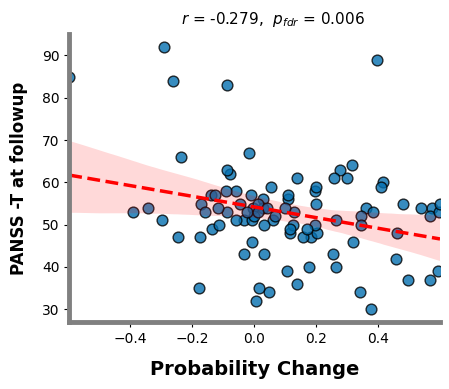

绘制变量 'stroop_incongruent_rt  at baseline' 的散点图：
  样本量：94
  Pearson 相关系数: r = -0.245
  原始 p 值: p = 0.017
  FDR 校正后的 p 值: 0.017
-----------------------------------------------------


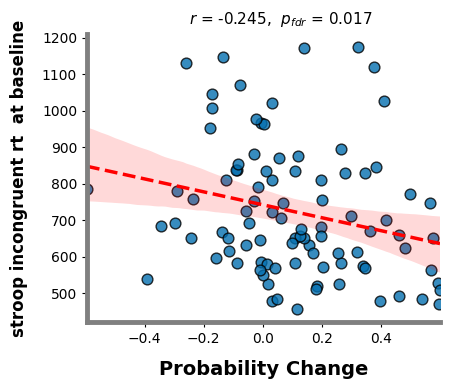

绘制变量 'nogo_acc  at baseline' 的散点图：
  样本量：94
  Pearson 相关系数: r = 0.260
  原始 p 值: p = 0.011
  FDR 校正后的 p 值: 0.011
-----------------------------------------------------


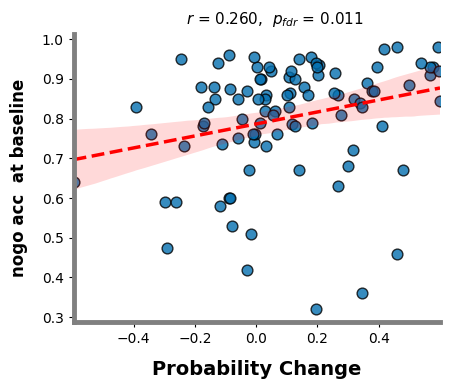

绘制变量 'PANSS-negative change' 的散点图：
  样本量：94
  Pearson 相关系数: r = -0.320
  原始 p 值: p = 0.002
  FDR 校正后的 p 值: 0.002
-----------------------------------------------------


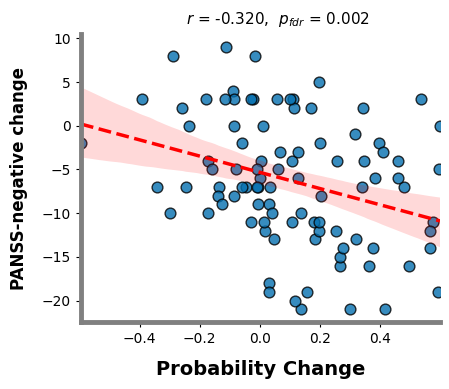

绘制变量 'PANSS-G change' 的散点图：
  样本量：94
  Pearson 相关系数: r = -0.335
  原始 p 值: p = 0.001
  FDR 校正后的 p 值: 0.001
-----------------------------------------------------


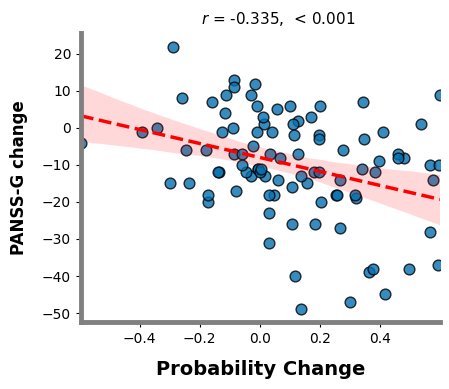

绘制变量 'PANSS-T change' 的散点图：
  样本量：94
  Pearson 相关系数: r = -0.320
  原始 p 值: p = 0.002
  FDR 校正后的 p 值: 0.002
-----------------------------------------------------


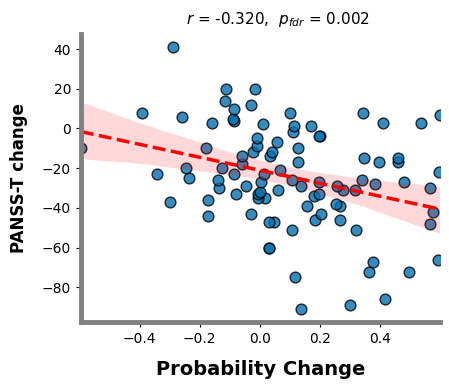

与 prob_change 显著相关变量的散点图已成功生成！


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 排除不参与筛选的变量：prob_pre、prob_post 和 prob_change
exclude_vars = ['prob_pre', 'prob_post', 'prob_change']

# 筛选与 prob_change 显著相关的变量（FDR 校正后的 p 值 < 0.05 且相关系数绝对值 > 0.2）
significant_vars = []
results = {}  # 用于保存每个变量的统计结果

for var in numeric_cols:
    if var in exclude_vars:
        continue  # 排除指定变量
    # 提取 prob_change 与当前变量的数据（去除缺失值）
    paired_data = df[['prob_change', var]].dropna()
    if len(paired_data) < 3:  # 数据点太少时跳过
        continue
    # 计算 Pearson 相关系数和原始 p 值
    coef, pval = stats.pearsonr(paired_data['prob_change'], paired_data[var])
    # 从之前计算好的 p 值矩阵中提取 FDR 校正后的 p 值（假定 pvals_matrix 已存在）
    fdr_pval = pvals_matrix.loc['prob_change', var]
    # 判断显著性：FDR p 值 < 0.05 且相关系数绝对值 > 0.2
    if fdr_pval < 0.05 and abs(coef) > 0.2:
        significant_vars.append(var)
        results[var] = {
            'n': len(paired_data),
            'coef': coef,
            'pval': pval,
            'fdr_pval': fdr_pval
        }

# 打印筛选后的显著变量列表及各变量的统计结果
print("与 prob_change 显著相关的变量：", significant_vars)
print("\n所有显著相关变量的统计结果：")
for var, res in results.items():
    print(f"变量：{var}")
    print(f"  样本量：{res['n']}")
    print(f"  Pearson 相关系数: r = {res['coef']:.3f}")
    print(f"  原始 p 值: p = {res['pval']:.3f}")
    print(f"  FDR 校正后的 p 值: {res['fdr_pval']:.3f}")
    print("-----------------------------------------------------")

# 对每个显著相关的变量绘制散点图及回归拟合线
for var in significant_vars:
    paired_data = df[['prob_change', var]].dropna()
    
    # 重新计算 Pearson 相关系数和 p 值（仅用于图中标注）
    coef, pval = stats.pearsonr(paired_data['prob_change'], paired_data[var])
    fdr_pval = pvals_matrix.loc['prob_change', var]
    fdr_pval_str = "< 0.001" if fdr_pval < 0.001 else f"$p_{{fdr}}$ = {fdr_pval:.3f}"
    
    # 打印当前变量的统计结果
    print(f"绘制变量 '{var}' 的散点图：")
    print(f"  样本量：{len(paired_data)}")
    print(f"  Pearson 相关系数: r = {coef:.3f}")
    print(f"  原始 p 值: p = {pval:.3f}")
    print(f"  FDR 校正后的 p 值: {fdr_pval:.3f}")
    print("-----------------------------------------------------")
    
    plt.figure(figsize=(4.6, 4))
    
    # 绘制散点图和回归线
    sns.regplot(
        x=paired_data['prob_change'],
        y=paired_data[var],
        scatter_kws={'alpha': 0.8, 's': 60, 'edgecolor': 'black', 'color': '#0570b0'},
        line_kws={'color': 'red', 'linewidth': 2.5, 'linestyle': '--'},
        ci=95
    )
    
    # 在图中标注相关系数和 FDR 校正后的 p 值
    plt.text(
        0.55, 1.05,
        f"$r$ = {coef:.3f},  {fdr_pval_str}",
        fontsize=11, 
        ha='center', va='center',
        transform=plt.gca().transAxes
    )
    
    # 修改 x 轴标签（这里用 'Probability Change' 表示 prob_change）
    plt.xlabel('Probability Change', fontsize=14, weight='bold', labelpad=10)
    # 将 y 轴标签中的下划线替换为空格
    plt.ylabel(var.replace('_', ' '), fontsize=12, weight='bold', labelpad=10)
    
    # 设置坐标轴字体大小
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # 设置图形边框样式
    ax = plt.gca()
    ax.spines['left'].set_linewidth(3.5)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_linewidth(3.5)
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # 调整布局，保存并显示图像
    plt.tight_layout()
    plt.savefig(f'./image/scatter_plot_prob_change_{var}.jpg', dpi=1200, bbox_inches='tight')
    plt.show()

print("与 prob_change 显著相关变量的散点图已成功生成！")

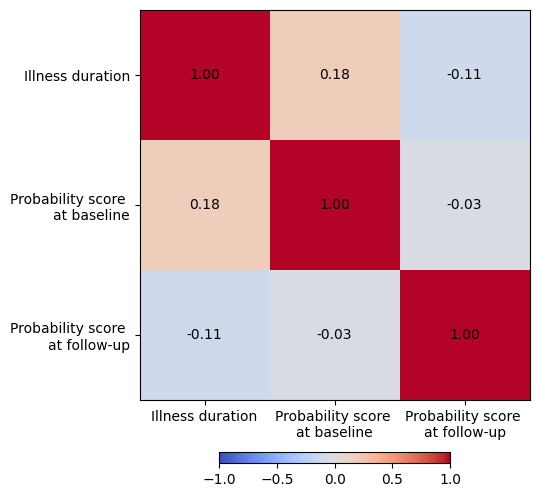

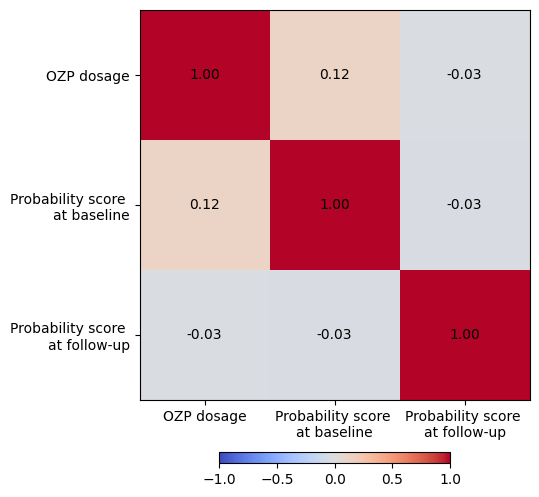

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

# 读取数据
df = pd.read_excel('table/三组likelihood.xlsx', sheet_name='Sheet3')

# 提取相关列
df_sub = df[['ID', 'Illness duration', 'OZP dosage', 'Probability score at baseline', 'Probability score at follow-up']]

# 计算相关性
corr_illness_prob = df_sub[['Illness duration', 'Probability score at baseline', 'Probability score at follow-up']].corr()
corr_ozp_prob = df_sub[['OZP dosage', 'Probability score at baseline', 'Probability score at follow-up']].corr()

# 提取p值进行FDRBH校正
p_values = []

for col1 in ['Illness duration', 'OZP dosage']:
    for col2 in ['Probability score at baseline', 'Probability score at follow-up']:
        corr_value, p_val = np.corrcoef(df_sub[col1], df_sub[col2])[0, 1], np.corrcoef(df_sub[col1], df_sub[col2])[0, 1]
        p_values.append(p_val)

# FDRBH校正
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# 更新列标签，仅在'at baseline'和'at follow-up'前加上\n
corr_illness_prob.columns = [col.replace('at baseline', '\nat baseline').replace('at follow-up', '\nat follow-up') for col in corr_illness_prob.columns]
corr_ozp_prob.columns = [col.replace('at baseline', '\nat baseline').replace('at follow-up', '\nat follow-up') for col in corr_ozp_prob.columns]

# 可视化第一个图 - Illness Duration vs Probability
fig1, ax1 = plt.subplots(figsize=(8, 5.5))  # Adjusted the size of the plot
cax1 = ax1.imshow(corr_illness_prob, cmap='coolwarm', vmin=-1, vmax=1)
ax1.set_xticks(np.arange(len(corr_illness_prob.columns)))
ax1.set_yticks(np.arange(len(corr_illness_prob.columns)))
ax1.set_xticklabels(corr_illness_prob.columns)
ax1.set_yticklabels(corr_illness_prob.columns)

# Annotate the correlation coefficients
for i in range(len(corr_illness_prob.columns)):
    for j in range(len(corr_illness_prob.columns)):
        ax1.text(j, i, f'{corr_illness_prob.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Display and save the first figure
fig1.colorbar(cax1, orientation='horizontal', shrink=0.3, pad=0.1)
fig1.tight_layout()
plt.savefig('OZP_Dosage_and_Probability1.jpg', dpi=1200, bbox_inches='tight')
plt.show()  # Show the first figure

# 可视化第二个图 - OZP Dosage vs Probability
fig2, ax2 = plt.subplots(figsize=(8, 5.5))  # Adjusted the size of the plot
cax2 = ax2.imshow(corr_ozp_prob, cmap='coolwarm', vmin=-1, vmax=1)
ax2.set_xticks(np.arange(len(corr_ozp_prob.columns)))
ax2.set_yticks(np.arange(len(corr_ozp_prob.columns)))
ax2.set_xticklabels(corr_ozp_prob.columns)
ax2.set_yticklabels(corr_ozp_prob.columns)

# Annotate the correlation coefficients
for i in range(len(corr_ozp_prob.columns)):
    for j in range(len(corr_ozp_prob.columns)):
        ax2.text(j, i, f'{corr_ozp_prob.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Display and save the second figure
fig2.colorbar(cax2, orientation='horizontal', shrink=0.3, pad=0.1)
fig2.tight_layout()
plt.savefig('OZP_Dosage_and_Probability2.jpg', dpi=1200, bbox_inches='tight')
plt.show()  # Show the second figure